# Guide

-   동기적 실행, 비동기적 실행을 함수의 호출관계로 생각하지 말고 **함수의 명령문들이 작성된 순서대로 실행되는 것으로 생각하자**

```python
def 배달():
    1. 짜장면을 배달한다.
    2. 먹기를 기다린다.
    3. 그릇을 받아 돌아온다.
```

    - 이것이 순서대로 실행되면 동기적 실행
    - 비동기는 먹기를 기다리지 않고 돌아와서 다른 배달을 하는 것. 이것을 비동기적 실행이라고 한다.

-   **예제는 .py로 실행한다.**
    -   jupyter notebook 에서 실행하지 않는다.
-   Generator도 Co-routine의 한 종류
-   **[이벤트 루프](<#이벤트-루프-(Event-Loop)>)**
    -   코루틴은 응답이 지연되는 부분에서 이벤트 루프에 통제권을 줄 수 있으며, 응답이 완료되었을 때 멈추었던 부분부터 기존의 상태를 유지한 채 남은 작업을 완료할 수 있는 함수
    -   https://sjquant.tistory.com/15
-   [주피터노트북 asyncio 실행 Runtime Error](#asyncio와-주피터노트북에서-에러)
    -   -   http://blog.naver.com/PostView.nhn?blogId=jinju2415&logNo=221546342937&categoryNo=45&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView
-   예전스타일

```python
import asyncio
import time
```

```python
# 코루틴 구현 (네이티브 코루틴 - def 앞에 async 붙인다.)
async def sleep():
    await asyncio.sleep(5)  #sleep(5초): 대기를 타게 되므로 await를 선언해 통제권을 event loop로 반환한다.

start = time.time()
```

```python
# 이벤트 루프 정의
loop = asyncio.get_event_loop()
# 이벤트 루프 실행
loop.run_until_complete(sleep()) # sleep() 호출->코루틴 호출
end = time.time()
print(str(end-start)+'s')
```


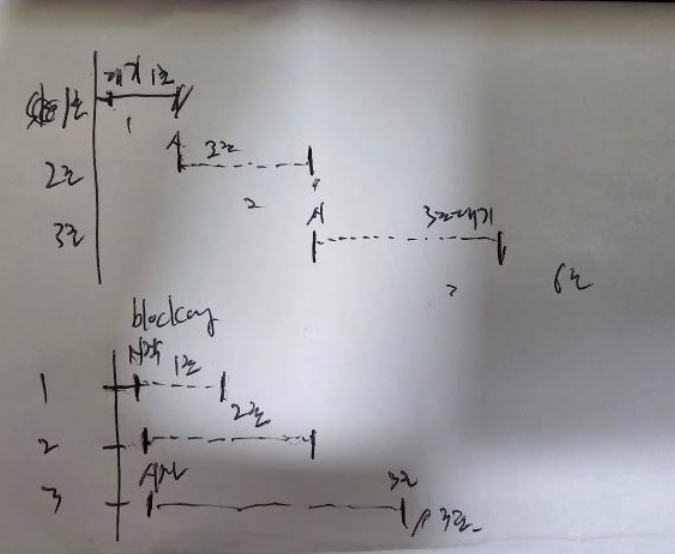


# 동기(Synchronous), 비동기(asynchronous) 프로그래밍이란

<img src="https://i.imgur.com/hh3Mawr.png" width="640">
<center><이미지출처> https://learnjs.vlpt.us/async/</center>

-   **동기적 처리**
    -   호출된 순서대로 종료된다.
    -   하나의 작업이 끝나야 다른 작업을 실행할 수 있다.
    -   cpu 작업과 io 작업을 번갈아 가면서 할 경우 자원이 효율적으로 사용되지 않는다.
-   **비동기적 처리**
    -   호출된 순서대로 종료되지 않을 수 있다.
    -   하나의 작업이 끝나지 않아도 다른 작업이 실행 될 수 있다.
    -   동시에 여러 작업을 실행할 수 있다.


# 코루틴(co-routine)을 이용한 비동기 프로그래밍


## 메인루틴과 서브루틴

-   **루틴이란**
    -   코드의 실행흐름을 말한다.
-   **메인 루틴**
    -   프로그램의 메인 흐름을 말한다. 동기적으로 처리된 프로그램의 경우 메인루틴이 종료되면 프로그램이 종료된다.
-   **서브루틴**
    -   메인루틴의 보조역할을 한다.
    -   하나의 진입점과 하나의 탈출점을 가진다.
        -   보통 메인루틴에서 호출한 함수나 메소드를 말한다.
-   메인루틴과 서브루틴의 동기적 실행 - 메인 루틴이 서브루틴을 호출하면 메인루틴은 대기하고 서브루틴이 동작한다. - 서브루틴이 종료되면 서브루틴은 제거되고 메인루틴으로 돌아와 나머지를 실행한다.
    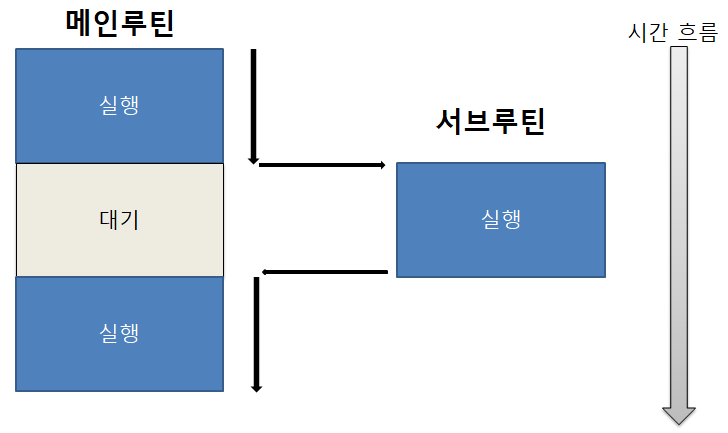


## 코루틴

-   메인루틴에서 호출되는 또 다른 형태의 서브루틴
    -   진입점과 탈출점이 여러개인 실행흐름이다.
    -   python은 generator 기반의 구현과 async/await를 이용한 구현 방식을 제공한다.
-   서브루틴과 차이점
    -   서브루틴은 실행이 끝나고 메인루틴으로 돌아가면 종료되어 사라지지만, **코루틴은 일시 정지 상태를 제공하여** 메인루틴과 상호작용이 가능하다.
    -   서브루틴은 진입점과 반환점이 단 하나밖에 없어 메인루틴에 종속적이지만, 코루틴은 진입지점이 여러개이기 때문에 메인루틴에 종속적이지 않아 대등하게 데이터를 주고 받을 수 있다.


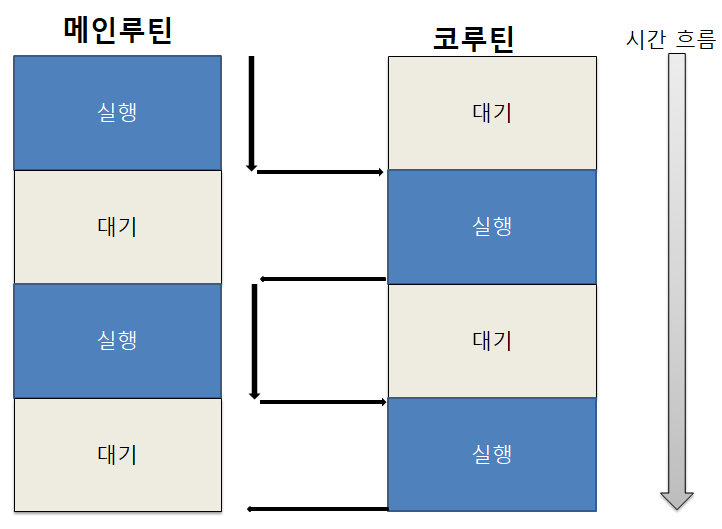


### 코루틴 개념코드

-   Generator는 코루틴의 한 종류이다.

> Generator
>
> -   값을 제공하는 로직(알고리즘)을 가지고 있는 iterable


In [5]:
# 구현: 선언 - 함수와 동일
#       body - (return 대신) yield 를 사용하면 generator
### 코루틴의 한종류
def my_gen(start=1):
    start += 10
    yield start  # 1  # 실행을 일시정지하고 호출한 곳을 돌아간다. yield (값) 값을 가지고 돌아간다.
    start += 10
    yield start  # 2
    start += 10
    yield start  # 3

In [7]:
# 메인 루틴 실행
## generator객체를 생성 -> 함수호출하듯이 한다.
gen = my_gen(10)
## generator 호출 -> next(gen객체)
a = next(gen)  # 1 yield 까지 실행.(일시정지)
print(a)
b = next(gen)  # 1 yield 다음 ~ 2 yield 까지 실행 (일시정지)
print(b)
c = next(gen)  # 2 yield 다음 ~ 3 yield 까지 실행.(일시정지)
print(c)
next(gen)  # 3 yield 다음 ~ return
# generator 로직이 끝나면 Exception(StopIteration)발생.

20
30
40


StopIteration: 

In [8]:
for i in my_gen(10):
    print(i)

20
30
40


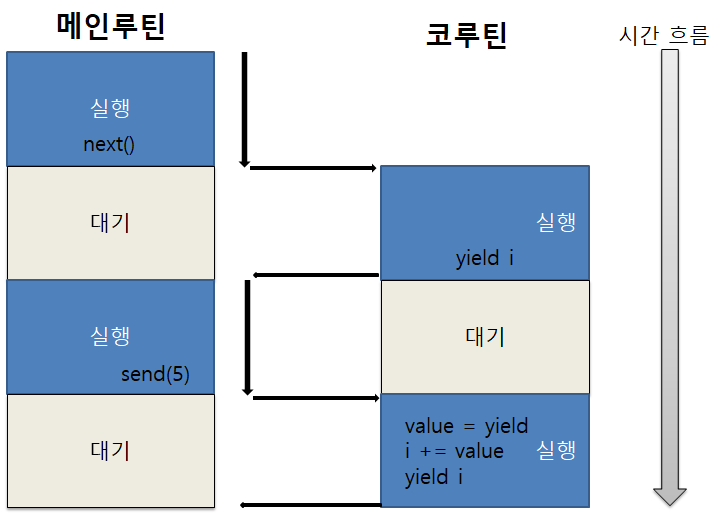


In [9]:
# 코루틴
def my_gen2(start=1):
    print("generator co-routine 시작")
    # 변수 = yield 반환값
    # 일시정지. 반환값을 가지고 호출한 곳으로 돌아간다.
    # 다시 호출 될때 메인루틴에서 전달한 값이 변수에 대입. (코루틴.send(값))
    while True:
        var = yield start
        start += var
        if start > 30:
            break

In [11]:
# 메인루틴
# generator 생성
try:
    gen2 = my_gen2()
    v = next(gen2)
    print(v)  # 1
    v2 = gen2.send(5)  # co-routine에 값을 전달하면서 호출(재개)
    print(v2)  # 6
    v3 = gen2.send(10)
    print(v3)  # 16
    v4 = gen2.send(20)  # start: 36 -> gen종료=>StopIteration Exception발생.
except StopIteration:
    pass

print("메인루틴 종료")

generator co-routine 시작
1
6
16
메인루틴 종료


In [15]:
i = (i for i in range(1, 11))  # 제너레이터 컴프리헨션
next(i)

1

In [16]:
for v in i:
    print(v)

2
3
4
5
6
7
8
9
10


# 이벤트 루프 (Event Loop)를 이용한 동시성 프로그래밍

-   여러개의 작업들을 등록해 놓고 반복문을 돌면서(Loop) 하나씩 실행시킨다. 만약 실행 시킨 작업에 **I/O blocking**과 같이 응답을 기다려야 한다면 이 작업은 통제권을 이벤트 루프에 돌려준다. 통제권을 받은 이벤트 루프는 대기중인 다음 작업을 실행 시킨다. (IO blocking등의 응답 대기 상태때문에 통제권을 이벤트 루프에 돌려주고) 대기했던 작업이 다시 실행되면 멈췄던 부분 다음 부터 실행하게 된다.
-   파이썬에서는 이벤트 루프에 의해 실행되는 Task는 실행과 대기를 반복해야 하므로 서브루틴(함수)이 아닌 **코루틴**으로 구성한다.

> -   **동시성(concurrency) 프로그래밍**
>     -   한번에 여러 작업을 동시에 처리한다.


# asyncio

-   이벤트 루프와 코루틴을 기반으로 동시성(concurrent) 프로그램을 작성할 수 있도록 해주는 파이썬 모듈.

## 네이티브 코루틴 정의

-   `async def` 를 이용해 코루틴 정의
    -   def 앞에 `async` 예약어를 붙이면 코루틴을 정의하는 것이 된다.
-   `await 코루틴` 을 이용해 코루틴 호출
    -   async로 선언된 코루틴을 호출 할 때는 await 예약어를 붙여서 호출해야 한다.
        -   async 코루틴을 awaitable 타입이라고 한다.
        -   await를 붙이지 않으면 코루틴 객체가 반환된다.
-   여러개의 코루틴을 비동기적으로 실행해야 하는 경우 `await asyncio.gather(코루틴, 코루틴, ...)` 으로 묶어서 호출한다.
-   main routine에서 코루틴을 호출 할 경우 `asyncio.run(코루틴)` 을 이용해 실행한다.
    -   코루틴이 아닌 함수에서 코루틴을 호출할 때 `asyncio.run()`을 사용

```python
async def test():
    pass

async def main():
    await test()

if __name__ == '__main__':
    asyncio.run(main())
```

> 일반함수 (async를 붙이 지 않고 선언한)를 비동기적으로 실행해야 하는 경우 `EventLoop객체.run_in_executor(None, 함수)`를 이용해 호출 한다. 이 경우 **Thread를 이용해 실행된다.**
>
> ```python
> loop = asyncio.get_event_loop()
> loop.run_in_executor(None, test)
> ```


> ## asyncio와 주피터노트북에서 에러
>
> -   그냥 실행하면 RuntimeError 발생
>     -   `RuntimeRrror: asyncio.run() cannot be called from a running event loop
> -   asyncio는 ipykernel 환경에서 event loop가 지원되지 않는 문제가 있다.
> -   nest_asyncio 설치
>     -   `pip install nest_asyncio`
> -   아래코드 실행 (처음 한번만 실행한다.)
>
> ```python
> import nest_asyncio
> nest_asyncio.apply()
> ```
>
> -   **터미널에서 cli로 실행할 경우는 상관없다.**


In [17]:
import nest_asyncio


nest_asyncio.apply()

In [21]:
# 동기적
import time


def my_sleep(sec):  # 일처리하는 로직
    time.sleep(sec)  # (IO) blocking 상황(cpu가 노는상황).


def main():
    my_sleep(1)
    my_sleep(2)
    my_sleep(3)


if __name__ == "__main__":
    start = time.time()  # 1970년 1월 1일 부터 실행 시점까지 몇초 지났는지 반환.
    main()
    end = time.time()
    print(f"{end - start} 초")

6.001704454421997 초


In [20]:
time.time()

1711521097.0878577

In [25]:
import asyncio



# 비동기 처리
## 코루틴 (함수) 정의


async def my_sleep2(sec):

    await asyncio.sleep(
        sec
    )  # 코루틴에서 다른 코루틴을 호출 await 붙인다. await를 붙이지 않으면 코루틴 객체 생성.

    return sec


## 메인 코루틴 -> task들을 만들어서 이벤트 루프에 등록하는 작업을 처리.
async def main2():
    # await my_sleep2(1)  # 코루틴을 바로실행 => 동기적처리
    # await my_sleep2(2)
    # await my_sleep2(3)


    ## 비동기적으로 처리 -> 각 코루틴들을 Event loop에 넣어서 실행대기
    #                      상태로 만들어줘야함.
    #  ==> 코루틴이 아닌 곳에서 : asyncio.run(코루틴객체)
    #  ==> 코루틴에서: Task로 정의 -> asyncio.create_task(코루틴객체)
    # task1 = asyncio.create_task(my_sleep2(1))
    # task2 = asyncio.create_task(my_sleep2(2))
    # task3 = asyncio.create_task(my_sleep2(3))

    # # task들을 이벤트 루프에 넣어서 실행 대기상태로 만들기: await Task
    # v1 = await task1  # 리턴값이 있는 코루틴 호출. 변수 = await Task
    # v2 = await task2
    # v3 = await task3
    # return v1, v2, v3


    # 여러개의 코루틴들을 task로 만들어서 이벤트 루프에 실행 대기상태로
    #                                                   등록 한번에 처리
    ## await asyncio.gather(코루틴객체, 코루틴객체, 코루틴객체, ...) # 가변인자

    result_list = await asyncio.gather(
        my_sleep2(1), my_sleep2(2), my_sleep2(3), my_sleep2(2)
    )

    return result_list



if __name__ == "__main__":

    # 메인 루틴 (코루틴이 아님)


    ## 코루틴이 아닌 흐름(일반함수)에서 코루틴을 호출
    s = time.time()


    v = asyncio.run(main2())  # asyncio.run(코루틴 객체)
    print(f"{time.time() - s}초")
    print(v)

3.005890130996704초
[1, 2, 3, 2]


# aiohttp 패키지

-   https://docs.aiohttp.org/en/stable/
-   asyncio를 위한 비동기 서버/클라이언트 처리를 위한 파이썬 라이브러리.
-   설치
    -   `pip install aiohttp`


In [27]:
import aiohttp
import asyncio


async def get_data():
    # aiohttp를 이용해서 https://www.python.org 요청.
    ## aiohttp : 1. ClientSession 생성. 2. ClientSession을 이용해서 http요청.
    ###          3. http요청, ClientSession 연결을 닫기.
    async with aiohttp.ClientSession() as session:
        async with session.get("https://www.python.org") as res:
            print("응답코드:", res.status)
            print("응답 header정보", res.headers)
            # 응답 html 조회: text() - 코루틴
            html = await res.text()
            print(len(html))
            print(html[:100])


if __name__ == "__main__":
    asyncio.run(get_data())

응답코드: 200
응답 header정보 <CIMultiDictProxy('Connection': 'keep-alive', 'Content-Length': '11804', 'Content-Type': 'text/html; charset=utf-8', 'X-Frame-Options': 'SAMEORIGIN', 'Content-Encoding': 'gzip', 'Via': '1.1 varnish, 1.1 varnish', 'Accept-Ranges': 'bytes', 'Date': 'Wed, 27 Mar 2024 07:51:17 GMT', 'Age': '3401', 'X-Served-By': 'cache-iad-kiad7000025-IAD, cache-icn1450034-ICN', 'X-Cache': 'HIT, HIT', 'X-Cache-Hits': '3, 8', 'X-Timer': 'S1711525877.333771,VS0,VE0', 'Vary': 'Cookie', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains; preload')>
50834
<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!-


In [2]:
base_url = "https://dictionary.cambridge.org/dictionary/english-korean/{}"
keywords = [
    "hi",
    "apple",
    "banana",
    "call",
    "feel",
    "hello",
    "bye",
    "like",
    "love",
    "environmental",
    "buzz",
    "ambition",
    "determine",
]
print(len(keywords))
urls = [base_url.format(keyword) for keyword in keywords]
urls[0]

13


'https://dictionary.cambridge.org/dictionary/english-korean/hi'

In [6]:
### 동기적 처리 - requests
import requests
from bs4 import BeautifulSoup
import time

user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"


def get_word(url):
    res = requests.get(url, headers={"user-agent": user_agent})
    print("요청:", url, ", 상태코드:", res.status_code)
    return BeautifulSoup(res.text, "lxml").text


if __name__ == "__main__":
    s = time.time()
    for url in urls:
        get_word(url)
    e = time.time()
    print(f"걸린시간: {e-s}초")
    # 걸린시간: 7.5424675941467285초

요청: https://dictionary.cambridge.org/dictionary/english-korean/hi , 상태코드: 200
요청: https://dictionary.cambridge.org/dictionary/english-korean/apple , 상태코드: 200
요청: https://dictionary.cambridge.org/dictionary/english-korean/banana , 상태코드: 200
요청: https://dictionary.cambridge.org/dictionary/english-korean/call , 상태코드: 200
요청: https://dictionary.cambridge.org/dictionary/english-korean/feel , 상태코드: 200
요청: https://dictionary.cambridge.org/dictionary/english-korean/hello , 상태코드: 200
요청: https://dictionary.cambridge.org/dictionary/english-korean/bye , 상태코드: 200
요청: https://dictionary.cambridge.org/dictionary/english-korean/like , 상태코드: 200
요청: https://dictionary.cambridge.org/dictionary/english-korean/love , 상태코드: 200
요청: https://dictionary.cambridge.org/dictionary/english-korean/environmental , 상태코드: 200
요청: https://dictionary.cambridge.org/dictionary/english-korean/buzz , 상태코드: 200
요청: https://dictionary.cambridge.org/dictionary/english-korean/ambition , 상태코드: 200
요청: https://dictionary.cam

In [8]:
import nest_asyncio


nest_asyncio.apply()

## GUIDE: 비동기적 방식

요청에 대한 응답을 기다리지 않고 바로 다른 요청을 하는 것을 확인할 수 있습니다. 또한, "hi > apple > banana" 순으로 요청했으나 응답은 "ambition > apple > love" 순으로 요청순서와 일치하지 않는 것을 확인할 수 있습니다. 이는 요청순서가 아니라 응답 순서로 코드를 처리했기 때문입니다.

# 주의

-   user agenet 헤더에 넣어야 한다.
-   ssl 오류 나는 경우 있다.
    -   ClientSession(connector=aiohttp.TCPConnector(ssl=False)) 지정한다.


In [9]:
### aiohttp를 이용해서 비동기적으로 요청
import aiohttp
import asyncio
import time

user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"


# url 하나에대한 요청 처리 코루틴
async def get_word2(url, session):
    async with session.get(url) as res:
        html = await res.text()
        return BeautifulSoup(html, "lxml").text


# get_words2() 코루틴들을 생성해서 Task로 등록
async def main(url_list):
    async with aiohttp.ClientSession(headers={"user-agent": user_agent}) as session:
        result = await asyncio.gather(*[get_word2(url, session) for url in url_list])
    return result  # 모든 task들의 반환값들을 모은 list


if __name__ == "__main__":
    s = time.time()
    result = asyncio.run(main(urls))
    e = time.time()
    print(f"걸린시간: {e-s}초")
    # 걸린시간: 0.7442245483398438초

걸린시간: 0.7442245483398438초


In [ ]:
# --------------------guide코드 이건 수업에 안한다. ====> requests를 이용한 비동기 코드---------------

import requests
import time
import asyncio
from functools import partial
from bs4 import BeautifulSoup


async def get_text_from_url(url):  # 코루틴 정의
    print(f"Send request to ... {url}")
    loop = asyncio.get_event_loop()

    # loop.run_in_executor는 kwargs(keyword arguments)를 사용할 수 없기 때문에 functools.partial을 활용
    request = partial(requests.get, url, headers=headers)
    # ascyncio의 디폴트 쓰레드풀을 사용할 경우 첫번째 인자로 None
    # 직접 쓰레드풀을 만들 경우 concurrent.futures.threadpoolexecutor 사용
    res = await loop.run_in_executor(None, request)
    print(f"Get response from ... {url}")
    text = BeautifulSoup(res.text, "html.parser").text
    print(text[:100].strip())


async def main():
    base_url = "https://dictionary.cambridge.org/ko/%EC%82%AC%EC%A0%84/%EC%98%81%EC%96%B4-%ED%95%9C%EA%B5%AD%EC%96%B4/{keyword}"
    keywords = [
        "hi",
        "apple",
        "banana",
        "call",
        "feel",
        "hello",
        "bye",
        "like",
        "love",
        "environmental",
        "buzz",
        "ambition",
        "determine",
        "tiger",
        "cat",
        "routine",
        "main",
        "function",
        "go",
        "get",
        "take",
        "run",
        "fruite",
        "zoo",
        "camel",
    ]

    # 아직 실행된 것이 아니라, 실행할 것을 계획하는 단계
    #     futures = [asyncio.ensure_future(get_text_from_url(
    #         base_url.format(keyword=keyword))) for keyword in keywords]
    tasks = [
        get_text_from_url(base_url.format(keyword=keyword)) for keyword in keywords
    ]
    await asyncio.gather(*tasks)


if __name__ == "__main__":

    start = time.perf_counter()
    loop = asyncio.get_event_loop()
    loop.run_until_complete(main())
    end = time.perf_counter()
    print(f"time taken: {end-start}")

# --------------수업엔 하지 않는다. -------------------------

## 코루틴이 아닌 함수 비동기적으로 이용

-   await 뒤에 오는 함수는 코루틴으로 작성되어야 비동기적으로 작업할 수 있다. 파이썬의 함수들은 대부분 코루틴으로 작성되지 않았는데 이런 함수들은 바로 호출 할 수 없다.
-   해결책: 이벤트 루프의 run_in_execute() 함수 사용
    -   첫 인자로 concurrent.futures.Executor 객체를 넣는데 보통 None으로 지정(asyncio의 내장 executor가 기본으로 실행됨), **두번째 인자로 사용하려는 함수 객체**를 **세번째 인자 부터는 호출하는 함수에 전달할 인자를 위치인자로 넣는다.** (keyword 인자 안됨)
    -   내부적으로 쓰레드로 실행된다.

## Guide

-   파이썬의 쓰레드는 GIL 때문에 context switch 비용이 크다. 그래서 사용할 수있으면 코루틴을 사용하는 것이 좋다.


In [ ]:
import asyncio, time


async def coroutine_3():
    print("코루틴 3 시작")
    print("코루틴 3 중단. 3초간 대기")
    loop = asyncio.get_event_loop()
    await loop.run_in_executor(None, time.sleep, 3)
    print("코루틴 3 재개")


async def coroutine_4():
    print("코루틴 4 시작")
    print("코루틴 4 중단. 3초간 대기")
    loop = asyncio.get_event_loop()
    await loop.run_in_executor(None, time.sleep, 3)
    #     await time.sleep(5) #예외발생. 5초후 await 실행시 에러 발생 coroutine 함수가 아니므로
    print("코루틴 4 재개")


if __name__ == "__main__":

    start = time.perf_counter()
    asyncio.run(asyncio.gather(coroutine_3(), coroutine_4()))
    end = time.perf_counter()
    print(f"걸린시간:{end-start}")

--------------수업엔 하지 않는다. 여기까지-------------------------
